In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in gdp_df? What are the data types of each column?

In [3]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)

In [5]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [6]:
n_by_year = gdp_df.groupby(["Year"])["Country"].count()
print(n_by_year)

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


In [7]:
n_by_country = gdp_df.groupby(["Country"])["Year"].count()
print(n_by_country)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: Year, Length: 242, dtype: int64


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [8]:
gdp_2020 = gdp_df.loc[gdp_df['Year'] == 2020]
print(gdp_2020.head())

                         Country  Year  GDP_Per_Capita
0                    Afghanistan  2020     1970.560169
19   Africa Eastern and Southern  2020     3491.978104
50    Africa Western and Central  2020     4021.293919
81                       Albania  2020    13253.733337
112                      Algeria  2020    10735.382539


<Axes: xlabel='GDP_Per_Capita', ylabel='Count'>

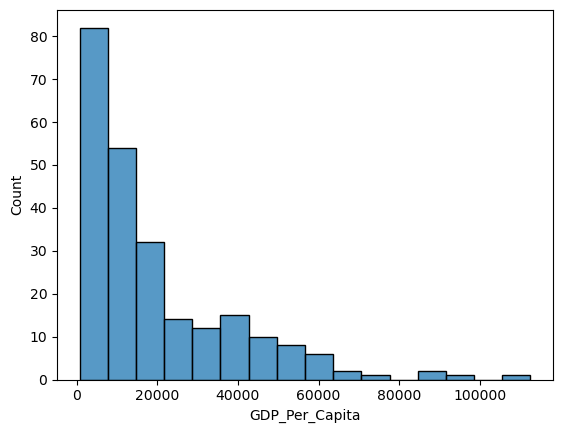

In [9]:
sns.histplot(data = gdp_2020
            ,x = 'GDP_Per_Capita'
            )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

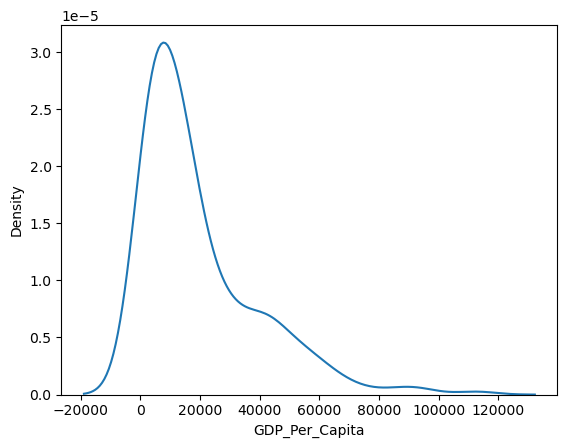

In [10]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita'>

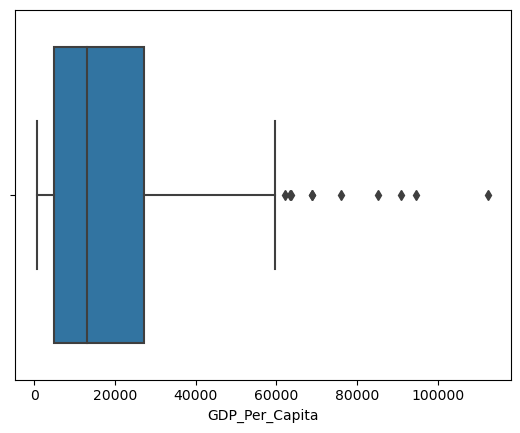

In [11]:
sns.boxplot(x=gdp_2020["GDP_Per_Capita"])

<Axes: xlabel='GDP_Per_Capita'>

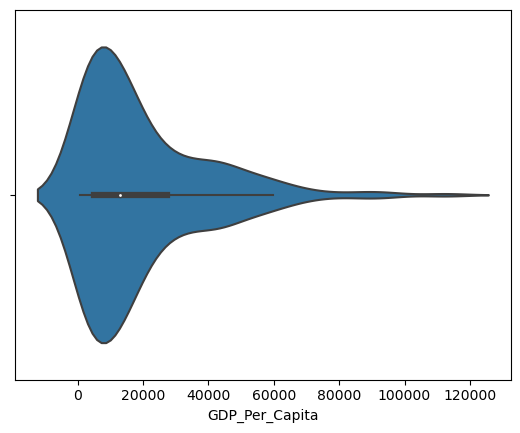

In [12]:
sns.violinplot(x=gdp_2020["GDP_Per_Capita"])

9. What was the median GDP per capita value in 2020?

In [13]:
print("GDP per capita, 2020 : ", gdp_2020['GDP_Per_Capita'].median())

GDP per capita, 2020 :  12908.9374056206


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

a) A boxplot
b) A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
c) A scatterplot
d) A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [16]:
gdp_decades = gdp_df.loc[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2000) | (gdp_df['Year'] == 2010) | (gdp_df['Year'] == 2020)]
print(gdp_decades.head())

                        Country  Year  GDP_Per_Capita
0                   Afghanistan  2020     1970.560169
10                  Afghanistan  2010     1957.029070
19  Africa Eastern and Southern  2020     3491.978104
29  Africa Eastern and Southern  2010     3545.205203
39  Africa Eastern and Southern  2000     2915.472987


<Axes: xlabel='GDP_Per_Capita'>

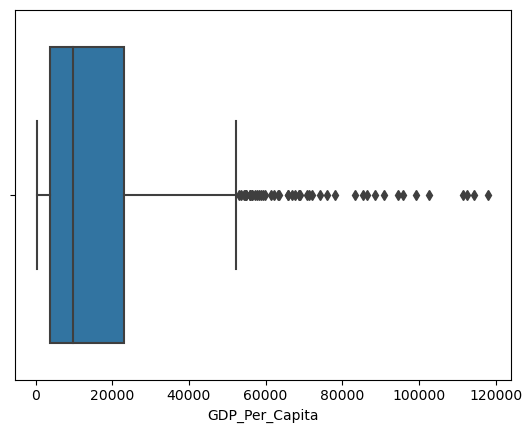

In [17]:
sns.boxplot(x=gdp_decades["GDP_Per_Capita"])

<BarContainer object of 918 artists>

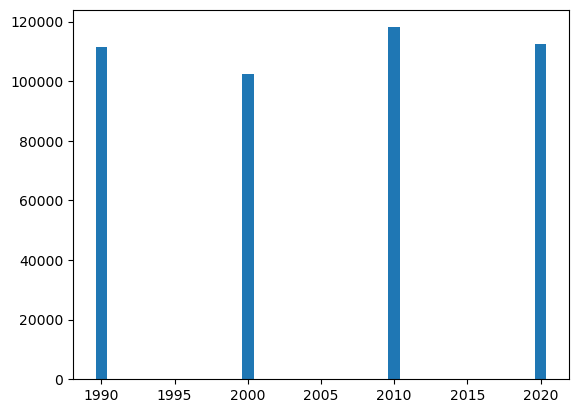

In [18]:
plt.bar(gdp_decades.Year, gdp_decades.GDP_Per_Capita)

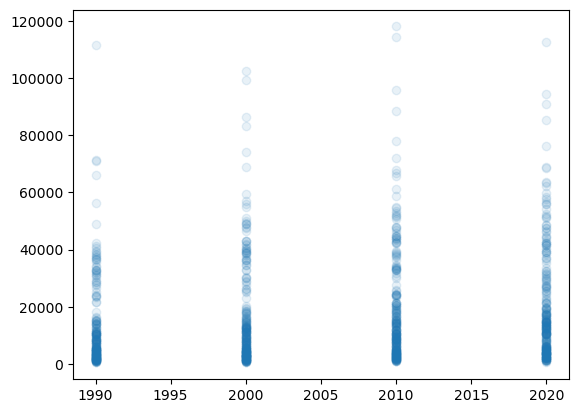

In [24]:
plt.scatter(gdp_decades.Year, gdp_decades.GDP_Per_Capita, alpha=0.1)


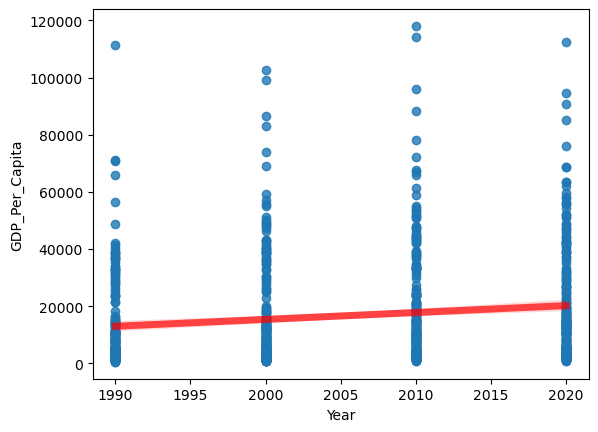

In [25]:
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

11. Which country was the first to have a GDP per capita greater than $100,000?

In [30]:
gdp_100k = gdp_df["GDP_Per_Capita"] > 100000
gdp_df[gdp_100k].sort_values("Year")

,Country,Year,GDP_Per_Capita
6838,United Arab Emirates,1990,111454.055665
6837,United Arab Emirates,1991,106103.552655
6836,United Arab Emirates,1992,103470.924576
6834,United Arab Emirates,1994,100213.156226
6833,United Arab Emirates,1995,101570.992100
6832,United Arab Emirates,1996,102211.638844
6831,United Arab Emirates,1997,105108.996265
6830,United Arab Emirates,1998,100100.435658
6828,United Arab Emirates,2000,102494.714624
3901,Luxembourg,2001,101143.147977


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [33]:
gdp_2020.sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
3882,Luxembourg,2020,112557.309472
5720,Singapore,2020,94505.636160
3071,Ireland,2020,90789.221024
5381,Qatar,2020,85290.450430
639,Bermuda,2020,76105.138057
...,...,...,...
4750,Niger,2020,1221.269930
5871,Somalia,2020,1180.965971
1524,Dem. Rep. Congo,2020,1082.445242
1136,Central African Republic,2020,937.856470


In [34]:
gdp_lux = gdp_df.loc[gdp_df['Country'] == 'Luxembourg']
print(gdp_lux.head())

         Country  Year  GDP_Per_Capita
3882  Luxembourg  2020   112557.309472
3883  Luxembourg  2019   116518.276815
3884  Luxembourg  2018   115049.926079
3885  Luxembourg  2017   114985.842236
3886  Luxembourg  2016   116283.699681


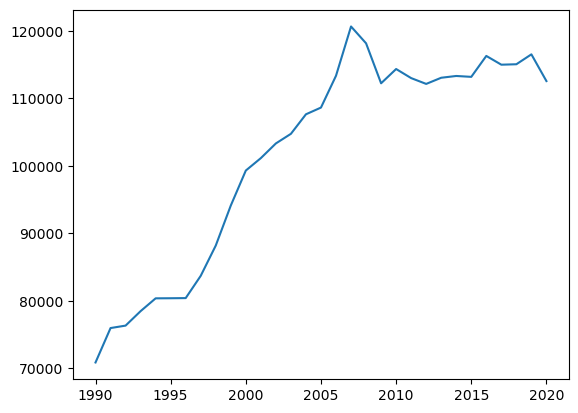

In [35]:
plt.plot(gdp_lux.Year, gdp_lux.GDP_Per_Capita)

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?



In [36]:
gdp_2020.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
914,Burundi,2020,731.064074
1136,Central African Republic,2020,937.856470
1524,Dem. Rep. Congo,2020,1082.445242
5871,Somalia,2020,1180.965971
4750,Niger,2020,1221.269930
...,...,...,...
639,Bermuda,2020,76105.138057
5381,Qatar,2020,85290.450430
3071,Ireland,2020,90789.221024
5720,Singapore,2020,94505.636160


In [37]:
gdp_burundi = gdp_df.loc[gdp_df['Country'] == 'Burundi']
print(gdp_burundi.head())

     Country  Year  GDP_Per_Capita
914  Burundi  2020      731.064074
915  Burundi  2019      751.443405
916  Burundi  2018      761.524143
917  Burundi  2017      773.572859
918  Burundi  2016      794.604340


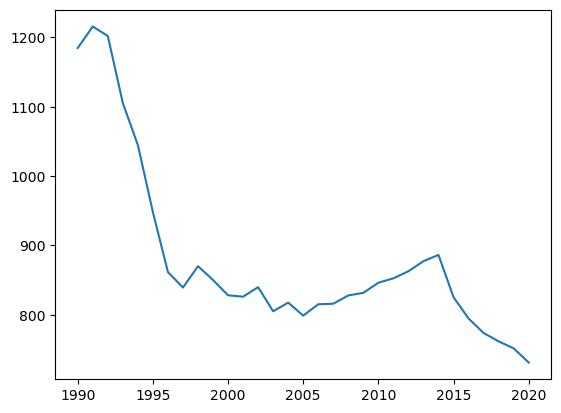

In [38]:
plt.plot(gdp_burundi.Year, gdp_burundi.GDP_Per_Capita)

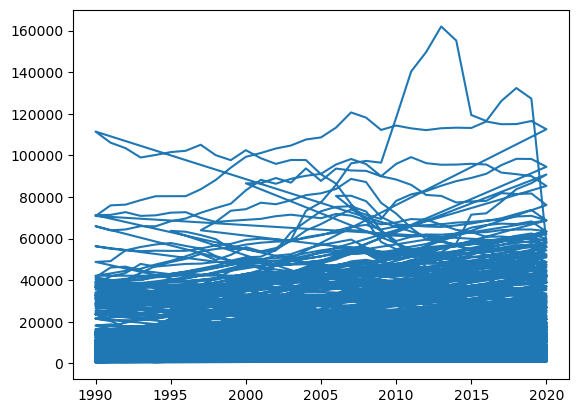

In [39]:
plt.plot(gdp_df.Year, gdp_df.GDP_Per_Capita)

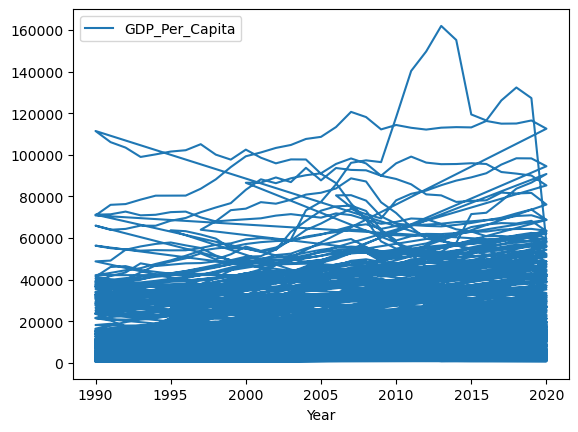

In [42]:
print("GDP per capita, 1990 : ", gdp_df[gdp_df["Year"] == 1990]["GDP_Per_Capita"].mean())

GDP per capita, 1990 :  12465.941627925598


In [43]:
print("GDP per capita, 2000 : ", gdp_df[gdp_df["Year"] == 2000]["GDP_Per_Capita"].mean())

GDP per capita, 2000 :  15497.235396977725
